# Epilepsy, real data, channel selection

real data, channel selection

In [1]:
# real data, epilepsy, ECoG exam
# https://openneuro.org/datasets/ds003029/versions/1.0.6

In [2]:
import os
import mne
import matplotlib.pyplot as plt
import numpy as np

Choose which patient to load

In [3]:
patientID = 2

In [4]:

prefixpath = 'dataset/ds003029'

patient_prefix = ('sub-pt2','sub-pt3')

# IMPORTANT: Before running this successfully, make sure you have imported the .eeg, .vhdr and .vmrk files in the dataset repo using 'git annex' 
datasetpath = f'{prefixpath}/{patient_prefix[patientID-1]}/ses-presurgery/ieeg'
vhdr_file = os.path.join(f'{datasetpath}/{patient_prefix[patientID-1]}_ses-presurgery_task-ictal_acq-ecog_run-01_ieeg.vhdr') 
eeg_file = os.path.join(f'{datasetpath}/{patient_prefix[patientID-1]}_ses-presurgery_task-ictal_acq-ecog_run-01_ieeg.eeg') 


# Load EcoG data using MNE
raw = mne.io.read_raw_brainvision(vhdr_file, preload=True)


eeg_data = raw.get_data()  # Shape: (n_channels, n_samples)
n_channels = eeg_data.shape[0]
num_samples = eeg_data.shape[1]
sampling_rate = int(raw.info['sfreq'])
times = raw.times
channel_names = raw.ch_names

total_duration = num_samples / sampling_rate
print(total_duration)

Extracting parameters from dataset/ds003029/sub-pt3/ses-presurgery/ieeg/sub-pt3_ses-presurgery_task-ictal_acq-ecog_run-01_ieeg.vhdr...
Setting channel info structure...
Reading 0 ... 332099  =      0.000 ...   332.099 secs...
332.1


In [5]:
# Print the list of channels' names and their numeric labels
# print("Channel Names and Numeric Labels:")
# for idx, name in enumerate(raw.ch_names):
#     print(f"Channel {idx}: {name}")

In [6]:
# Selected Channels of Interest for both patients
channels_of_interest = (list(range(33, 37)) + list(range(42, 44)) + list(range(48, 52)) + list(range(52, 56)) + list(range(66, 68)),\
                        list(range(109, 112)) + list(range(126, 128)))


channels_of_interest = channels_of_interest[patientID-1]

In [7]:
# Print the names of the selected channels
for ch_index in channels_of_interest:
   print(f'Channel {ch_index + 1}: {channel_names[ch_index]}')

Channel 110: LALT3
Channel 111: LALT4
Channel 112: LALT5
Channel 127: LAST2
Channel 128: LAST3


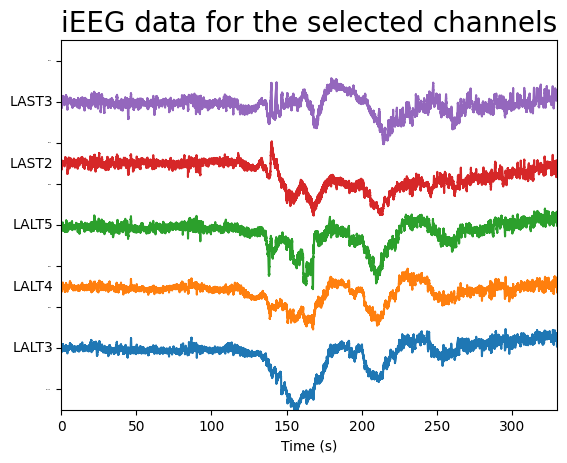

In [8]:

# Increase the offset for spacing
spacing = 30e-4  # Space between channels
for i, channel_idx in enumerate(channels_of_interest):

    plt.plot(times, eeg_data[channel_idx] + i * spacing)  

    plt.text(-5, i * spacing, channel_names[channel_idx], fontsize=10, verticalalignment='center', horizontalalignment='right')


plt.title('iEEG data for the selected channels', fontsize=20)
plt.xlabel('Time (s)', fontsize=10)
plt.xlim(0, 330) 
plt.ylim(-spacing, len(channels_of_interest) * spacing)  

plt.xticks(fontsize=10)  
plt.yticks(fontsize=0)  


# Save the plot as a PDF
plt.savefig('output/iEEG_data_selected_few_pat3.pdf')
plt.show()


In [9]:
# export .txt for each channel


output_dir = f"channels_for_sonification/patient{patientID}"
os.makedirs(output_dir, exist_ok=True)


for ch_idx in channels_of_interest:
    
    data_to_save = np.column_stack((times, eeg_data[ch_idx]))

    
    # Save Dataset
    file_path = os.path.join(output_dir, f"{channel_names[ch_idx]}_no_first.txt")

    np.savetxt(file_path, data_to_save, fmt="%.6f", delimiter="\t", comments="")

print(f"Time series for selected channels saved in '{output_dir}' directory.")

Time series for selected channels saved in 'channels_for_sonification/patient2' directory.
